In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
train = pd.read_csv('0505final_train.csv')

In [4]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
#train = shuffle(train)

In [5]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [6]:
new_all_feature = preprocessing.scale(train_feature)

In [7]:
train_feature.mean(axis=0)

AGE                    51.612565
GENDER                  0.523560
BMI                    24.790890
T                      36.460209
P                      81.638743
R                      16.774869
fracture_type           0.104712
painsco                 2.246073
OP_CODE              7850.015707
wBC                     8.542408
HEMOGLOBIN             13.169634
HCT                    40.267016
PLATELETS             271.104712
BUN                    14.851309
CREATININE              0.756545
occupation_A            0.230366
occupation_B            0.151832
occupation_C            0.204188
occupation_D            0.167539
occupation_E            0.073298
occupation_F            0.073298
occupation_G            0.031414
occupation_H            0.068063
WHERE_A                 0.109948
WHERE_B                 0.068063
WHERE_C                 0.115183
WHERE_D                 0.225131
WHERE_E                 0.089005
WHERE_F                 0.219895
WHERE_G                 0.052356
WHERE_H   

In [8]:
train_feature.std(axis=0)

AGE                    20.526918
GENDER                  0.500757
BMI                     4.303283
T                       0.503135
P                      13.235533
R                       2.228192
fracture_type           0.306987
painsco                 0.730661
OP_CODE              3540.000314
wBC                     3.459226
HEMOGLOBIN              1.917460
HCT                     4.966711
PLATELETS              62.967824
BUN                     4.081200
CREATININE              0.189032
occupation_A            0.422174
occupation_B            0.359802
occupation_C            0.404167
occupation_D            0.374438
occupation_E            0.261311
occupation_F            0.261311
occupation_G            0.174891
occupation_H            0.252516
WHERE_A                 0.313647
WHERE_B                 0.252516
WHERE_C                 0.320082
WHERE_D                 0.418766
WHERE_E                 0.285500
WHERE_F                 0.415264
WHERE_G                 0.223329
WHERE_H   

In [9]:
DataFrame_feature = pd.DataFrame(new_all_feature)

In [10]:
DataFrame_feature.to_csv("feature_data2.csv",index=False)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [12]:
model = Sequential()

In [13]:
model.add( Dense(units=128, input_shape=[52],            #52,47
                 kernel_initializer='he_normal',
                 kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
                 activation='relu') )

In [14]:
model.add(Dropout(0.4))  #ep 300

In [15]:
model.add( Dense(units=64,
                 kernel_initializer='he_normal',  #he_normal
                 kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
                 activation='relu'))   #relu

In [16]:
model.add(Dropout(0.4))  #ep 100    #0.5  #0.3

In [17]:
model.add( Dense(units=4, 
#                kernel_initializer='normal',
                 activation='softmax'))    # kernel_initializer='normal',

In [18]:
model.compile( optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
train_history = model.fit(new_all_feature , train_y, 
                          validation_split=0.1, 
                          epochs = 50, batch_size=15,verbose=2)

Train on 171 samples, validate on 20 samples
Epoch 1/50
 - 0s - loss: 31.2234 - acc: 0.3392 - val_loss: 28.9680 - val_acc: 0.4500
Epoch 2/50
 - 0s - loss: 28.1183 - acc: 0.3626 - val_loss: 26.3480 - val_acc: 0.4000
Epoch 3/50
 - 0s - loss: 25.4267 - acc: 0.5088 - val_loss: 24.0206 - val_acc: 0.4500
Epoch 4/50
 - 0s - loss: 23.2113 - acc: 0.4269 - val_loss: 21.8600 - val_acc: 0.4500
Epoch 5/50
 - 0s - loss: 21.0473 - acc: 0.4620 - val_loss: 19.8855 - val_acc: 0.5000
Epoch 6/50
 - 0s - loss: 19.0294 - acc: 0.5439 - val_loss: 18.0762 - val_acc: 0.5500
Epoch 7/50
 - 0s - loss: 17.3543 - acc: 0.4737 - val_loss: 16.4197 - val_acc: 0.5500
Epoch 8/50
 - 0s - loss: 15.6716 - acc: 0.5205 - val_loss: 14.8963 - val_acc: 0.5500
Epoch 9/50
 - 0s - loss: 14.2562 - acc: 0.5029 - val_loss: 13.5058 - val_acc: 0.5500
Epoch 10/50
 - 0s - loss: 12.8894 - acc: 0.5497 - val_loss: 12.2473 - val_acc: 0.5500
Epoch 11/50
 - 0s - loss: 11.5669 - acc: 0.6082 - val_loss: 11.1112 - val_acc: 0.5500
Epoch 12/50
 - 0s 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):  #,validation
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

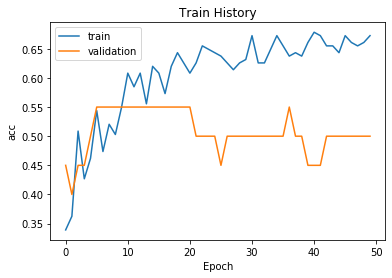

In [21]:
show_train_history(train_history,'acc','val_acc')

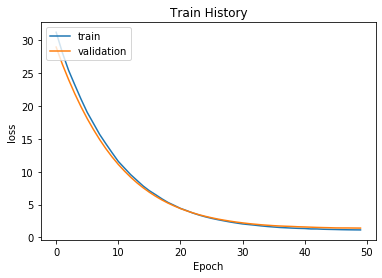

In [22]:
show_train_history(train_history,'loss','val_loss')  #

In [23]:
from keras.models import load_model
#model.save('model0505_new.h5')

In [24]:
import tensorflowjs as tfjs

In [25]:
#tfjs.converters.save_keras_model(model,'./model_file')  